In [194]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std

C:\Users\steve\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


![](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/NumPy_logo.svg/775px-NumPy_logo.svg.png)

## The Scientific Python ecosystem is built on Numpy
![](https://gcpy.readthedocs.io/en/latest/_images/state_of_the_stack_2015.png)

## Arrays

The basic object of numpy is the ndarray

An ndarray is a multidimensional container of items of the same type and size. The number of dimensions and items in an array is defined by its shape

In [2]:
x = np.array([1,2,3,4])
print(x)
print(f'Shape:{x.shape}')

[1 2 3 4]
Shape:(4,)


In [3]:
# Mixed type arrays are coerced to the more general type or throws an error
x = np.array([1,2,3,'oops'])
print(x)

['1' '2' '3' 'oops']


In [4]:
x = np.array([[1,1],[2,2]])
print('A 2-D array:')
print(x)
print(f'Shape:{x.shape}')

A 2-D array:
[[1 1]
 [2 2]]
Shape:(2, 2)


In [5]:
x = np.array([[[1,1],[2,2]],[[3,3],[4,4]]])
print('A 3-D array:')
print(x)
print(f'Shape:{x.shape}')

A 3-D array:
[[[1 1]
  [2 2]]

 [[3 3]
  [4 4]]]
Shape:(2, 2, 2)


## Vectorization
Arrays are important because they enable you to express batch operations on data without writing any for loops. This is usually called vectorization. Any arithmetic operations between equal-size arrays applies the operation elementwise.

Vectorization is more than just a concise way of writing computations, it is **fast**.

For loops are generally executed in Python while numpy vectorized calculations are offloaded to compiled C or Fortran code.  This has two benefits:
1. compiled C and Fortan are just faster than Python as an interpreted language
2. Frees up the Python GIL to do other work

In [6]:
# Initialize two 1-D arrays of length 1,000
a = np.random.rand(1000)
b = np.random.rand(1000)

In [7]:
%%timeit 
a*b

958 ns ± 46.7 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [8]:
%%timeit 
for i in range(1000):
    a[i]*b[i]

350 µs ± 29 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


The vectorized calculation in this example is 100s of times faster than the non-vectorized calculation.

**When working with numerical computation on an array, you should always look for a vectorized way of executing.**

## Universal Functions (ufunc)

Numpy refers to its vectorized calculations as universal functions. From the docs: a ufunc is a “vectorized” wrapper for a function that takes a fixed number of specific inputs and produces a fixed number of specific outputs.  There are a [ton of them](https://docs.scipy.org/doc/numpy-1.15.1/reference/ufuncs.html) many of which have short-hand arithmetic notation.  Many of the ufuncs are also callable as a method (see sum)

In [ ]:
x = np.random.rand(1000,1000)
# How many vectorized/ufunc calclations are embedded in this line of code?
np.logical_or(x<.025, x>.975).sum()/(1000**2)

In [ ]:
np.divide(np.sum(np.logical_or(np.less(x,.025), np.greater(x,.975))),(1000**2))

#### Exercise 3.1: What is the coefficient of variation of x (standard deviation/mean) of x?:

In [ ]:
x = np.arange(100)

In [ ]:
# Your answer here:

#%load ./answers/03.1.py

## Slicing
Often you will want to hone into certain data in the array.  If you know the position of the elements in the array, you can use slicing notation which uses brackets of the form `[start:stop:step]` for every dimension of the array.  Each paramater of the slicer is optional.
1. If you omit start, it will start from the first element
2. If you omit stop, it will end at the last element
3. If you omit step, it will grab every element between start and stop
4. If you set step to -1, it will reverse the order of elements

** Slicing is a Python construct not unique to numpy. These rules are useful for pandas, lists in addition to numpy arrays **

In [ ]:
x = np.array([1,2,3,4,5,6,7,8,9,10])
print(x[3:6])
print(x[:])
print(x[1::2])
print(x[::-2])

In [ ]:
x = np.array([[(y+1)*(x+1) for y in range(10)] for x in range(10)])
print(x)
print(x[5:8,0:3])
print(x[::-1,::-1])

#### Exercise 3.2: Extract the values in the 3rd through 6th index of x in reverse order?

In [ ]:
x = np.arange(10)

In [ ]:
# Your answer here:

#%load ./answers/03.2.py

## Filtering with boolean arrays
A boolean array is an array where the elements take on True of False values.  You can filter a multidimensional array by boolean arrays.  You can also create boolean arrays by applying boolean expressions against non-boolean arrays.  To filter by boolean arrays, the boolean array must have the same shape as the array to be filtered.

In [ ]:
x = np.array([1,2,3,4,5,6])
y = np.array([True,False,False,True,True,False])
x[y]

In [ ]:
x[x>3]

#### Exercise 3.3: Create an array of values 1 to 100 and filter out all elements that are divisible by 4 using the np.mod ufunc.

In [ ]:
x = np.arange(100)+1

In [ ]:
# Your answer here:

#%load ./answers/03.3.py

## Aggregates along an Axis (dimension)
There are a variety of aggregate functions you can apply to a dimension
sum, min, max, count, cumsum, var, prod, percentile are all valid aggregate functions.
To aggregate over a specific axis, use the axis argument.  There are versions of all of these functions 
that are designed to ignore invalid elements.


In [ ]:
x = np.array([1,2,3,4,5,6])
print(np.sum(x))
x = np.array([1,2,np.nan,4,5,6])
print(np.sum(x))

In [ ]:
x = np.array([1,2,np.nan,4,5,6])
print(np.nansum(x))

In [ ]:
x = np.array([[(y+1)*(x+1) for y in range(10)] for x in range(10)])
print(x)
print(np.sum(x,axis=1))
print(np.sum(x))

##### Exercise 3.4: What is the mean of the sum of each column in x?

In [ ]:
x = np.array([[(y+1)*(x+1) for y in range(-5,5)] for x in range(10)])

In [ ]:
# Your answer here:

#%load ./answers/03.4.py

## Modifying shape
You will often need to append additional dimensions, elements within dimensions, or generally change the shape of a multi-dimensional array.

reshape, expand_dims, and concatenate are your friends for this.

In [ ]:
x = np.arange(12)+1
print(x)
print(np.reshape(x, (4,3)))
print(np.reshape(x, (3,2,2)))

In [ ]:
x = np.arange(10)
print(x)
x = np.expand_dims(x, axis=1)
print(x)
y = 2*x
np.concatenate((x,y),axis=1)

#### Exercise3.5: Transpose x to a 100 x 1 matrix using reshape.

In [ ]:
x = np.arange(100)

In [ ]:
# Your answer here:

#%load ./answers/03.5.py

## Real world example

Building a multi-dimensional IBNR model in numpy

### Create Initial multi-dimensional array

In [15]:
import pandas as pd
cas = pd.read_csv(r'http://www.casact.org/research/reserve_data/wkcomp_pos.csv')
# Let's make the pandas dataframe look more triangle like
triangle_frame = pd.pivot_table(cas[cas['DevelopmentYear']<=1997], 
                                values='CumPaidLoss_D', 
                                index=['GRNAME','AccidentYear'], 
                                columns='DevelopmentLag')
# Let's use the reshape method to create a 3-D Matrix of triangles
triangle_array = np.array(triangle_frame).reshape(len(cas['GRNAME'].unique()),
                                                  len(cas['AccidentYear'].unique()),
                                                  len(cas['DevelopmentLag'].unique()))

In [20]:
triangle_frame

DevelopmentLag                                        1        2        3   \
GRNAME                              AccidentYear                             
Agway Ins Co                        1988             1.0      0.0      0.0   
                                    1989             0.0      0.0      0.0   
                                    1990             0.0      2.0      2.0   
                                    1991             8.0     17.0     25.0   
                                    1992             0.0      0.0      0.0   
                                    1993             0.0      0.0      0.0   
                                    1994             0.0      0.0      0.0   
                                    1995             0.0      0.0      0.0   
                                    1996             0.0      0.0      NaN   
                                    1997             0.0      NaN      NaN   
Alaska Nat Ins Co                   1988          4386.0   7912.0   9668.0   
                                    1989          5321.0  10223.0  12162.0   
                                    1990          4775.0  10594.0  13524.0   
                                    1991          6731.0  15173.0  18551.0   
                                    1992          9166.0  18877.0  22168.0   
                                    1993          8321.0  16556.0  19539.0   
                                    1994          7045.0  14434.0  17173.0   
                                    1995          7332.0  15222.0  18450.0   
                                    1996          6599.0  12870.0      NaN   
                                    1997          7048.0      NaN      NaN   
Alaska Timber Ins Exchange          1988          2270.0   4322.0   4981.0   
                                    1989          3040.0   4948.0   5891.0   
                                    1990          3637.0   6621.0   7703.0   
                                    1991          2259.0   4259.0   5485.0   
                                    1992          1644.0   3218.0   3989.0   
                                    1993          1399.0   2865.0   4117.0   
                                    1994          1461.0   4164.0   5042.0   
                                    1995          2257.0   4648.0   5559.0   
                                    1996          2342.0   4342.0      NaN   
                                    1997          1778.0      NaN      NaN   
...                                                  ...      ...      ...   
Workers Comp Exch                   1988          1186.0   2124.0   2639.0   
                                    1989          1314.0   2045.0   3096.0   
                                    1990          1130.0   2187.0   2719.0   
                                    1991          1074.0   2010.0   2469.0   
                                    1992           760.0   1888.0   2271.0   
                                    1993          1071.0   2303.0   2883.0   
                                    1994           708.0   1834.0   2413.0   
                                    1995           996.0   2155.0   2639.0   
                                    1996           648.0   1435.0      NaN   
                                    1997           997.0      NaN      NaN   
Yasuda Fire & Marine Ins Co Of Amer 1988          1773.0   3152.0   4097.0   
                                    1989          1652.0   4710.0   6715.0   
                                    1990          3527.0   9360.0  13075.0   
                                    1991          5977.0  14660.0  20553.0   
                                    1992          7568.0  15487.0  20504.0   
                                    1993          3723.0   7138.0   9212.0   
                                    1994          2690.0   5389.0   6533.0   
                                    1995          2454.0   4948.0   6349.0   
                      

In [ ]:
x

In [ ]:
x

In [ ]:
# triangle array is a set 10x10 triangles for more than 100 companies.
triangle_array.shape

### Clean up missing and zero values

In [ ]:
# This is not a very good triangle to have in our model.
triangle_array[-1]

In [ ]:
# Let's get rid of completely empty triangles
triangle_sum = np.nansum(np.nansum(triangle_array, axis=1),axis=1)
triangle_array = triangle_array[triangle_sum!=0,:,:]
# let's turn 0's to nan - this will alleviate issues around dividing by zero
triangle_array[triangle_array==0]=np.nan

### Age-to-age factors

In [ ]:
# Let's use slicing to create age-to-age factors
ata_array = triangle_array[:,:-1,1:]/triangle_array[:,:-1,:-1]
# Let's default the completely blank age-to-age columns with 1.0
accident_periods = len(cas['DevelopmentLag'].unique())
ata_array_defaults = np.expand_dims(np.all(np.isnan(ata_array),axis=1),axis=1)
ata_array[np.repeat(ata_array_defaults,accident_periods-1,axis=1)]=1.0

### LDFs and CDFs

In [ ]:
# Let's create an array of LDFs, by taking simple averages of the age-to-age factors.
ldf_array = np.nanmean(ata_array, axis=1)
ldf_array[np.isnan(ldf_array)]=1.0
# Let's create an array of CDFs with a tail factor from our LDFs
cdf_array = ldf_array[:,::-1].cumprod(axis=1)[:,::-1]
tail_factor = 1.0
cdf_array = np.append(cdf_array,np.expand_dims(np.repeat(tail_factor,cdf_array.shape[0]),1),axis=1)

### Ultimates and IBNR

In [ ]:
latest_diagonal = np.nan_to_num(np.diagonal(triangle_array[:,::-1,],axis1=1,axis2=2)[:,::-1])
ultimate = latest_diagonal * cdf_array[:,::-1]
ibnr = ultimate - latest_diagonal

### The business questions answered by our model

In [ ]:
companies = np.array(triangle_frame.index.levels[0])[triangle_sum!=0]
print('How much IBNR does the entire industry need according to this model?')
print(np.sum(ibnr).round(0))
print()
print('What is the average ultimate to paid ratio across the industry?')
print((np.sum(ultimate)/np.sum(latest_diagonal)).round(3))
print()
print('Which company has the highest 12-Ultimate CDF?')
print(companies[np.argmax(cdf_array[:,0])])
print()
print('Which company has the lowest 12-24 LDF?')
print(companies[np.argmin(ldf_array[:,1])])
print()
print('What is the 95% confidence interval on the estimate of 12-Ultimate CDF?')
print((np.sort(cdf_array[:,1])[int(.025*len(cdf_array[:,1]))],cdf_array[:,1][int(.975*len(cdf_array[:,1]))]))

Performance test of the above code 

In [ ]:
%%timeit
triangle_array = np.array(triangle_frame).reshape(len(cas['GRNAME'].unique()),len(cas['AccidentYear'].unique()),len(cas['DevelopmentLag'].unique()))
triangle_sum = np.nansum(np.nansum(triangle_array, axis=1),axis=1)
triangle_array = triangle_array[triangle_sum!=0,:,:]
triangle_array[triangle_array==0]=np.nan
ata_array = triangle_array[:,:-1,1:]/triangle_array[:,:-1,:-1]
accident_periods = len(cas['DevelopmentLag'].unique())
ata_array_defaults = np.expand_dims(np.all(np.isnan(ata_array),axis=1),axis=1)
ata_array[np.repeat(ata_array_defaults,accident_periods-1,axis=1)]=1.0
ldf_array = np.nanmean(ata_array, axis=1)
ldf_array[np.isnan(ldf_array)]=1.0
cdf_array = ldf_array[:,::-1].cumprod(axis=1)[:,::-1]
tail_factor = 1.0
cdf_array = np.append(cdf_array,np.expand_dims(np.repeat(tail_factor,cdf_array.shape[0]),1),axis=1)
latest_diagonal = np.nan_to_num(np.diagonal(triangle_array[:,::-1,],axis1=1,axis2=2)[:,::-1])
ultimate = latest_diagonal * cdf_array[:,::-1]
ibnr = ultimate - latest_diagonal

In [ ]:
for m in [ i for i in dir(np) if i[0] >= 'a' and i[0]<='z']:
    print(m)

In [14]:
for m in [ i for i in dir(np.random) if i[0] >= 'a' and i[0]<='z']:
    print(m)

absolute_import
bench
beta
binomial
bytes
chisquare
choice
dirichlet
division
exponential
f
gamma
geometric
get_state
gumbel
hypergeometric
info
laplace
logistic
lognormal
logseries
mtrand
multinomial
multivariate_normal
negative_binomial
noncentral_chisquare
noncentral_f
normal
np
operator
pareto
permutation
poisson
power
print_function
rand
randint
randn
random
random_integers
random_sample
ranf
rayleigh
sample
seed
set_state
shuffle
standard_cauchy
standard_exponential
standard_gamma
standard_normal
standard_t
test
triangular
uniform
vonmises
wald
warnings
weibull
zipf


In [ ]:
# optional pause for something more advanced... 
for m in [ i for i in dir(np) if i[0] >= 'a' and i[0]<='z']:
    print(f'\n\n{m}\n{"="*len(m)}\n')
    print(np.__getattribute__(m).__doc__)

In [ ]:
df = pd.DataFrame([(i, getattr(x, i).__doc__) for i in dir(x)], columns=['Method', 'Help'])

In [120]:
cas.columns

Index(['GRCODE', 'GRNAME', 'AccidentYear', 'DevelopmentYear', 'DevelopmentLag',
       'IncurLoss_D', 'CumPaidLoss_D', 'BulkLoss_D', 'EarnedPremDIR_D',
       'EarnedPremCeded_D', 'EarnedPremNet_D', 'Single', 'PostedReserve97_D',
       'Line'],
      dtype='object')

In [127]:
N1 = pd.read_csv(r'http://www.mynl.com/RPM/masterdata.csv')

In [ ]:
plt.figure(figsize=(12,12))
plt.plot(np.log(np.log(N1.PaidLoss)), np.log(np.log(N1.UltIncLoss)), 'x', alpha=0.05)

In [129]:
N2 = N1.set_index(keys=['Line', 'GRName', 'AY', 'Lag'], inplace=False)

In [130]:
pd.unique(N1.Line)

array(['Comm Auto', 'PP Auto', 'Work Comp', 'Products Liab', 'Other Liab',
       'Med Mal'], dtype=object)

In [133]:
N1[ (N1.GRName == 'Alaska Nat Ins Co') & (N1.Line=='Comm Auto')].head(5)

12 ms ± 1.61 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [134]:
N1.query(' GRName == "Alaska Nat Ins Co" and Line=="Comm Auto" ').head(5)

4.51 ms ± 230 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [135]:
N2.head()

GRCode    DY  UltIncLoss  \
Line      GRName                  AY   Lag                             
Comm Auto Public Underwriters Grp 1988 1       266  1988         0.0   
                                       2       266  1989         0.0   
                                       3       266  1990         0.0   
                                       4       266  1991         0.0   
                                       5       266  1992         0.0   

                                            PaidLoss  CaseIncLoss  BulkLoss  \
Line      GRName                  AY   Lag                                    
Comm Auto Public Underwriters Grp 1988 1         0.0          0.0       0.0   
                                       2         0.0          0.0       0.0   
                                       3         0.0          0.0       0.0   
                                       4         0.0          0.0       0.0   
                                       5         0.0          0.0       0.0   

                                            EarnedPrem  PostedReserve97  
Line      GRName                  AY   Lag                               
Comm Auto Public Underwriters Grp 1988 1           0.0            932.0  
                                       2           0.0            932.0  
                                       3           0.0            932.0  
                                       4           0.0            932.0  
                                       5           0.0            932.0

In [137]:
N2.loc[(slice(None), 'FM Global'), :].head(5)

GRCode    DY  UltIncLoss  PaidLoss  CaseIncLoss  \
Line      GRName    AY   Lag                                                    
Comm Auto FM Global 1988 1       655  1988         0.0       0.0          0.0   
                         2       655  1989         0.0       0.0          0.0   
                         3       655  1990         0.0       0.0          0.0   
                         4       655  1991         0.0       0.0          0.0   
                         5       655  1992         0.0       0.0          0.0   

                              BulkLoss  EarnedPrem  PostedReserve97  
Line      GRName    AY   Lag                                         
Comm Auto FM Global 1988 1         0.0        -3.0           2833.0  
                         2         0.0        -3.0           2833.0  
                         3         0.0        -3.0           2833.0  
                         4         0.0        -3.0           2833.0  
                         5         0.0        -3.0           2833.0

In [138]:
N2.loc[(slice(None), slice(None), 1990), :].head(5)

GRCode    DY  UltIncLoss  \
Line      GRName                  AY   Lag                             
Comm Auto Public Underwriters Grp 1990 1       266  1990       191.0   
                                       2       266  1991       142.0   
                                       3       266  1992       130.0   
                                       4       266  1993       134.0   
                                       5       266  1994       128.0   

                                            PaidLoss  CaseIncLoss  BulkLoss  \
Line      GRName                  AY   Lag                                    
Comm Auto Public Underwriters Grp 1990 1        52.0        142.0      49.0   
                                       2        95.0        134.0       8.0   
                                       3       105.0        125.0       5.0   
                                       4       117.0        131.0       3.0   
                                       5       128.0        128.0       0.0   

                                            EarnedPrem  PostedReserve97  
Line      GRName                  AY   Lag                               
Comm Auto Public Underwriters Grp 1990 1         265.0            932.0  
                                       2         265.0            932.0  
                                       3         265.0            932.0  
                                       4         265.0            932.0  
                                       5         265.0            932.0

In [139]:
N2.xs(('Canal Ins Co Grp', 'Comm Auto'), level=('GRName', 'Line')).head(3)

GRCode    DY  UltIncLoss  PaidLoss  CaseIncLoss  BulkLoss  \
AY   Lag                                                              
1988 1      2623  1988     46246.0    9352.0      44422.0    1824.0   
     2      2623  1989     41193.0   18101.0      41170.0      23.0   
     3      2623  1990     40192.0   22309.0      40192.0       0.0   

          EarnedPrem  PostedReserve97  
AY   Lag                               
1988 1       64523.0         125636.0  
     2       64523.0         125636.0  
     3       64523.0         125636.0

In [142]:
G = pd.pivot_table(N1.query(" GRName=='State Farm Mut Grp' "), values='PaidLoss', index=['GRName', 'Line', 'AY'], columns='Lag')
G.head(10)

Lag                                     1         2         3         4   \
GRName             Line      AY                                            
State Farm Mut Grp Comm Auto 1988  54699.0  108337.0  143899.0  164818.0   
                             1989  60091.0  119366.0  151151.0  174665.0   
                             1990  65860.0  130803.0  172390.0  197977.0   
                             1991  61946.0  121108.0  158880.0  182689.0   
                             1992  65043.0  128550.0  164433.0  187508.0   
                             1993  72295.0  144579.0  185446.0  208388.0   
                             1994  81988.0  151197.0  189630.0  212446.0   
                             1995  83207.0  152470.0  190974.0  212923.0   
                             1996  79699.0  143590.0  184346.0  206780.0   
                             1997  75827.0  143120.0  184965.0  206565.0   

Lag                                      5         6         7         8   \
GRName             Line      AY                                             
State Farm Mut Grp Comm Auto 1988  179538.0  185391.0  188023.0  189759.0   
                             1989  185469.0  192213.0  196152.0  198013.0   
                             1990  210230.0  219267.0  222428.0  224078.0   
                             1991  195247.0  201854.0  204911.0  205535.0   
                             1992  199823.0  208008.0  210925.0  213006.0   
                             1993  219345.0  225981.0  230040.0  231594.0   
                             1994  229511.0  237406.0  240779.0  242463.0   
                             1995  226193.0  233723.0  237024.0  237748.0   
                             1996  224327.0  233298.0  237216.0  236725.0   
                             1997  220052.0  225837.0  229414.0  230996.0   

Lag                                      9         10  
GRName             Line      AY                        
State Farm Mut Grp Comm Auto 1988  190520.0  193499.0  
                             1989  199997.0  200480.0  
                             1990  224855.0  225430.0  
                             1991  206051.0  206719.0  
                             1992  214097.0  214524.0  
                             1993  232739.0  233365.0  
                             1994  242860.0  244280.0  
                             1995  239596.0  240184.0  
                             1996  236825.0  237368.0  
                             1997  230301.0  230775.0

In [143]:
# link ratios 
for i in range(2,11):
    G[str(i) + '_to_' + str(i-1)] = G[i] / G[i-1]
    
G.head(10)

Lag                                      1         2         3         4  \
GRName             Line      AY                                            
State Farm Mut Grp Comm Auto 1988  54699.0  108337.0  143899.0  164818.0   
                             1989  60091.0  119366.0  151151.0  174665.0   
                             1990  65860.0  130803.0  172390.0  197977.0   
                             1991  61946.0  121108.0  158880.0  182689.0   
                             1992  65043.0  128550.0  164433.0  187508.0   
                             1993  72295.0  144579.0  185446.0  208388.0   
                             1994  81988.0  151197.0  189630.0  212446.0   
                             1995  83207.0  152470.0  190974.0  212923.0   
                             1996  79699.0  143590.0  184346.0  206780.0   
                             1997  75827.0  143120.0  184965.0  206565.0   

Lag                                       5         6         7         8  \
GRName             Line      AY                                             
State Farm Mut Grp Comm Auto 1988  179538.0  185391.0  188023.0  189759.0   
                             1989  185469.0  192213.0  196152.0  198013.0   
                             1990  210230.0  219267.0  222428.0  224078.0   
                             1991  195247.0  201854.0  204911.0  205535.0   
                             1992  199823.0  208008.0  210925.0  213006.0   
                             1993  219345.0  225981.0  230040.0  231594.0   
                             1994  229511.0  237406.0  240779.0  242463.0   
                             1995  226193.0  233723.0  237024.0  237748.0   
                             1996  224327.0  233298.0  237216.0  236725.0   
                             1997  220052.0  225837.0  229414.0  230996.0   

Lag                                       9        10    2_to_1    3_to_2  \
GRName             Line      AY                                             
State Farm Mut Grp Comm Auto 1988  190520.0  193499.0  1.980603  1.328254   
                             1989  199997.0  200480.0  1.986421  1.266282   
                             1990  224855.0  225430.0  1.986077  1.317936   
                             1991  206051.0  206719.0  1.955058  1.311887   
                             1992  214097.0  214524.0  1.976385  1.279137   
                             1993  232739.0  233365.0  1.999848  1.282662   
                             1994  242860.0  244280.0  1.844136  1.254192   
                             1995  239596.0  240184.0  1.832418  1.252535   
                             1996  236825.0  237368.0  1.801654  1.283836   
                             1997  230301.0  230775.0  1.887454  1.292377   

Lag                                  4_to_3    5_to_4    6_to_5    7_to_6  \
GRName             Line      AY                                             
State Farm Mut Grp Comm Auto 1988  1.145373  1.089311  1.032600  1.014197   
                             1989  1.155566  1.061856  1.036362  1.020493   
                             1990  1.148425  1.061891  1.042986  1.014416   
                             1991  1.149855  1.068740  1.033839  1.015145   
                             1992  1.140331  1.065677  1.040961  1.014023   
                             1993  1.123713  1.052580  1.030254  1.017962   
                             1994  1.120319  1.080326  1.034399  1.014208   
                             1995  1.114932  1.062323  1.033290  1.014124   
                             1996  1.121695  1.084858  1.039991  1.016794   
                             1997  1.116779  1.065292  1.026289  1.015839   

Lag                                  8_to_7    9_to_8   10_to_9  
GRName             Line      AY                                  
State Farm Mut Grp Comm Auto 1988  1.009233  1.004010  1.015636  
                             1989  1.009488  1.010020  1.002415  
                             1990  1.007418  1.0

In [144]:
H = N1[N1.Line=='Comm Auto']

In [145]:
H.head()

,Line,GRCode,GRName,AY,DY,Lag,UltIncLoss,PaidLoss,CaseIncLoss,BulkLoss,EarnedPrem,PostedReserve97
0,Comm Auto,266,Public Underwriters Grp,1988,1988,1,0.0,0.0,0.0,0.0,0.0,932.0
1,Comm Auto,266,Public Underwriters Grp,1988,1989,2,0.0,0.0,0.0,0.0,0.0,932.0
2,Comm Auto,266,Public Underwriters Grp,1988,1990,3,0.0,0.0,0.0,0.0,0.0,932.0
3,Comm Auto,266,Public Underwriters Grp,1988,1991,4,0.0,0.0,0.0,0.0,0.0,932.0
4,Comm Auto,266,Public Underwriters Grp,1988,1992,5,0.0,0.0,0.0,0.0,0.0,932.0


In [146]:
# make a triangle
G = pd.pivot_table(N1, values='PaidLoss', index=['Line', 'GRName', 'AY'], columns='Lag')
for i in range(2,11):
    G['L_' + str(i-1)] = G[i] / G[i-1]
pd.set_option('display.multi_sparse', True)
G.head(20)



Lag                              1      2      3      4      5      6      7  \
Line      GRName       AY                                                      
Comm Auto Aegis Grp    1988    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
                       1989    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
                       1990    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
                       1991    8.0   21.0   21.0   21.0   21.0   21.0   21.0   
                       1992    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
                       1993    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
                       1994    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
                       1995    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
                       1996    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
                       1997    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
          Agway Ins Co 1988   72.0  122.0  142.0  156.0  167.0  175.0  180.0   
                       1989   68.0  130.0  149.0  172.0  219.0  227.0  230.0   
                       1990  129.0  218.0  326.0  389.0  395.0  400.0  403.0   
                       1991  365.0  536.0  574.0  676.0  692.0  763.0  790.0   
                       1992  155.0  226.0  310.0  550.0  589.0  623.0  626.0   
                       1993  182.0  335.0  606.0  804.0  852.0  861.0  865.0   
                       1994  246.0  431.0  695.0  806.0  842.0  940.0  942.0   
                       1995  226.0  362.0  386.0  410.0  420.0  421.0  425.0   
                       1996  174.0  252.0  331.0  515.0  523.0  527.0  526.0   
                       1997  276.0  468.0  498.0  635.0  672.0  696.0  705.0   

Lag                              8      9     10       L_1       L_2  \
Line      GRName       AY                                              
Comm Auto Aegis Grp    1988    0.0    0.0    0.0       NaN       NaN   
                       1989    0.0    0.0    0.0       NaN       NaN   
                       1990    0.0    0.0    0.0       NaN       NaN   
                       1991   21.0   21.0   21.0  2.625000  1.000000   
                       1992    0.0    0.0    0.0       NaN       NaN   
                       1993    0.0    0.0    0.0       NaN       NaN   
                       1994    0.0    0.0    0.0       NaN       NaN   
                       1995    0.0    0.0    0.0       NaN       NaN   
                       1996    0.0    0.0    0.0       NaN       NaN   
                       1997    0.0    0.0    0.0       NaN       NaN   
          Agway Ins Co 1988  181.0  184.0  184.0  1.694444  1.163934   
                       1989  232.0  233.0  233.0  1.911765  1.146154   
                       1990  405.0  406.0  407.0  1.689922  1.495413   
                       1991  792.0  793.0  794.0  1.468493  1.070896   
                       1992  627.0  627.0  629.0  1.458065  1.371681   
                       1993  953.0  956.0  956.0  1.840659  1.808955   
                       1994  968.0  968.0  969.0  1.752033  1.612529   
                       1995  424.0  424.0  424.0  1.601770  1.066298   
                       1996  526.0  526.0  527.0  1.448276  1.313492   
                       1997  705.0  706.0  706.0  1.695652  1.064103   

Lag                               L_3       L_4       L_5       L_6       L_7  \
Line      GRName       AY                                                       
Comm Auto Aegis Grp    1988       NaN       NaN       NaN       NaN       NaN   
                       1989       NaN       NaN       NaN       NaN       NaN   
                       1990       NaN       NaN       NaN       NaN       NaN   
                       1991  1.000000  1.000000  1.000000  1.000000  1.000000   
                       1992       NaN       NaN       NaN       NaN       NaN   
                       1993       NaN       NaN       NaN       NaN       NaN   
      

In [ ]:
sorted(N1.GRName.unique())

In [162]:
curr_year = 1997
line_name = 'Comm Auto'
co_name = 'Vanliner Ins Co'
G = pd.pivot_table(N1[ (N1.AY+N1.Lag <= curr_year+1) & (N1.Line==line_name) & (N1.GRName==co_name) ], 
                       values=['PaidLoss', 'CaseIncLoss'], 
                       index='AY', columns='Lag')
G

CaseIncLoss                                                        \
Lag           1        2        3        4        5        6        7    
AY                                                                       
1988      5746.0   5104.0   7663.0   8306.0   9039.0   9579.0   9512.0   
1989      7846.0  13715.0  17455.0  19899.0  20954.0  21487.0  20915.0   
1990     10016.0  17527.0  23619.0  27025.0  28599.0  28814.0  28622.0   
1991     14050.0  18287.0  27135.0  30100.0  31227.0  31701.0  31871.0   
1992     19079.0  28716.0  35364.0  39116.0  39778.0  39802.0      NaN   
1993     29014.0  37196.0  43756.0  46588.0  47559.0      NaN      NaN   
1994     24486.0  31386.0  35712.0  37918.0      NaN      NaN      NaN   
1995     22483.0  29795.0  33720.0      NaN      NaN      NaN      NaN   
1996     10315.0  11959.0      NaN      NaN      NaN      NaN      NaN   
1997      9678.0      NaN      NaN      NaN      NaN      NaN      NaN   

                                PaidLoss                                      \
Lag        8        9        10       1        2        3        4        5    
AY                                                                             
1988  10072.0  10074.0  10074.0    981.0   3618.0   4832.0   7434.0   8158.0   
1989  21005.0  21008.0      NaN   2063.0   6144.0  12431.0  17103.0  19201.0   
1990  28954.0      NaN      NaN   3434.0   8344.0  14294.0  21371.0  24809.0   
1991      NaN      NaN      NaN   3894.0   5752.0  14859.0  21971.0  27456.0   
1992      NaN      NaN      NaN   4710.0  10714.0  20395.0  29704.0  35521.0   
1993      NaN      NaN      NaN   6468.0  15469.0  26759.0  37437.0  42680.0   
1994      NaN      NaN      NaN   6611.0  13879.0  23464.0  30120.0      NaN   
1995      NaN      NaN      NaN   7656.0  15973.0  23651.0      NaN      NaN   
1996      NaN      NaN      NaN   4037.0   7106.0      NaN      NaN      NaN   
1997      NaN      NaN      NaN   4021.0      NaN      NaN      NaN      NaN   

                                                   
Lag        6        7        8        9        10  
AY                                                 
1988   9176.0   9346.0  10072.0  10074.0  10074.0  
1989  20087.0  20344.0  20995.0  20991.0      NaN  
1990  27236.0  27609.0  28515.0      NaN      NaN  
1991  29822.0  30879.0      NaN      NaN      NaN  
1992  37604.0      NaN      NaN      NaN      NaN  
1993      NaN      NaN      NaN      NaN      NaN  
1994      NaN      NaN      NaN      NaN      NaN  
1995      NaN      NaN      NaN      NaN      NaN  
1996      NaN      NaN      NaN      NaN      NaN  
1997      NaN      NaN      NaN      NaN      NaN

In [163]:
def wtd_last_n(T, col_name, n, agg_f, label):
    yrs = T.shape[0]
    last_year = T.index[-1]
    n-=1
    return pd.DataFrame( { label : \
        [np.sum(T.loc[(last_year-i-n-1):(last_year-i-1), (col_name, i+2)]) / \
              np.sum(T.loc[(last_year-i-n-1):(last_year-i-1), (col_name, i+1)]) for i in range(yrs-1)] } ).T
  

In [165]:
wtd_last_n(G, 'PaidLoss', 5, np.sum, 'Pd last 5')

,0,1,2,3,4,5,6,7,8
Pd last 5,2.14168,1.766197,1.409257,1.173068,1.076252,1.021513,1.039844,0.999936,1.0


In [166]:
pd.concat([G.groupby(by=lambda x : 'Wtd').apply( lambda x : wtd_last_n(x, 'PaidLoss', i, np.sum, 'L'+str(i))) for i in [3,5,9]])

0         1         2         3         4         5         6  \
Wtd L3  2.019122  1.630017  1.377283  1.185665  1.078327  1.021868  1.039844   
    L5  2.141680  1.766197  1.409257  1.173068  1.076252  1.021513  1.039844   
    L9  2.182943  1.760918  1.411043  1.168901  1.076252  1.021513  1.039844   

               7    8  
Wtd L3  0.999936  1.0  
    L5  0.999936  1.0  
    L9  0.999936  1.0

In [169]:
big_cos = ['State Farm Mut Grp', 'Federal Ins Co Grp', 'Canal Ins Co Grp', 'Erie Ins Exchange Grp', 
           'Employers Mut Co Of Des Moines', 'New Jersey Manufacturers Grp', 'Pennsylvania Natl Ins Grp', 
           'Vanliner Ins Co', 'Lancer Ins Co', 'Protective Ins Grp', 'FL Farm Bureau Grp', 'Harco Natl Ins Co', 
           'Century-Natl Ins Co', 'NC Farm Bureau Ins Grp', 'National American Ins Co', 'Philadelphia Ind Ins Co & Aff', 
           'West Bend Mut Ins Grp', 'Church Mut Ins Co', 'Lumber Ins Cos', 'Farmers Automobile Grp', 'Grinnell Mut Grp']
                    

In [173]:
def known_ctrs_ex( line_name, curr_year):
    '''
    add all company triangles for given line 
    '''
    G = pd.pivot_table(N1[ (N1.AY+N1.Lag <= curr_year+1) & (N1.Line==line_name) & (N1['GRName'].isin(big_cos))], 
                       values=['PaidLoss', 'CaseIncLoss'], 
                       index=['GRName', 'AY'], columns='Lag')
    ## add link ratios 
    for ls in ['CaseIncLoss', 'PaidLoss']:
        for i in range(2,11):
            G[(ls+'Link', i-1)] = G[(ls, i)] / G[(ls, i-1)]
    G.columns.names = ['LossType', 'Lag']
    G.sort_index(axis=1, inplace=True)
    return G

In [174]:
H = known_ctrs_ex('Comm Auto', 1997)

In [176]:
H.loc[('Vanliner Ins Co', 1988):('Vanliner Ins Co', 1998), :]

LossType             CaseIncLoss                                               \
Lag                           1        2        3        4        5        6    
GRName          AY                                                              
Vanliner Ins Co 1988      5746.0   5104.0   7663.0   8306.0   9039.0   9579.0   
                1989      7846.0  13715.0  17455.0  19899.0  20954.0  21487.0   
                1990     10016.0  17527.0  23619.0  27025.0  28599.0  28814.0   
                1991     14050.0  18287.0  27135.0  30100.0  31227.0  31701.0   
                1992     19079.0  28716.0  35364.0  39116.0  39778.0  39802.0   
                1993     29014.0  37196.0  43756.0  46588.0  47559.0      NaN   
                1994     24486.0  31386.0  35712.0  37918.0      NaN      NaN   
                1995     22483.0  29795.0  33720.0      NaN      NaN      NaN   
                1996     10315.0  11959.0      NaN      NaN      NaN      NaN   
                1997      9678.0      NaN      NaN      NaN      NaN      NaN   

LossType                                                 ...  PaidLoss  \
Lag                        7        8        9        10 ...        10   
GRName          AY                                       ...             
Vanliner Ins Co 1988   9512.0  10072.0  10074.0  10074.0 ...   10074.0   
                1989  20915.0  21005.0  21008.0      NaN ...       NaN   
                1990  28622.0  28954.0      NaN      NaN ...       NaN   
                1991  31871.0      NaN      NaN      NaN ...       NaN   
                1992      NaN      NaN      NaN      NaN ...       NaN   
                1993      NaN      NaN      NaN      NaN ...       NaN   
                1994      NaN      NaN      NaN      NaN ...       NaN   
                1995      NaN      NaN      NaN      NaN ...       NaN   
                1996      NaN      NaN      NaN      NaN ...       NaN   
                1997      NaN      NaN      NaN      NaN ...       NaN   

LossType             PaidLossLink                                          \
Lag                            1         2         3         4         5    
GRName          AY                                                          
Vanliner Ins Co 1988     3.688073  1.335544  1.538493  1.097390  1.124785   
                1989     2.978187  2.023275  1.375835  1.122669  1.046143   
                1990     2.429819  1.713087  1.495103  1.160872  1.097827   
                1991     1.477144  2.583275  1.478632  1.249647  1.086174   
                1992     2.274735  1.903584  1.456435  1.195832  1.058641   
                1993     2.391620  1.729847  1.399043  1.140049       NaN   
                1994     2.099380  1.690612  1.283669       NaN       NaN   
                1995     2.086338  1.480686       NaN       NaN       NaN   
                1996     1.760218       NaN       NaN       NaN       NaN   
                1997          NaN       NaN       NaN       NaN       NaN   

LossType                                                 
Lag                         6         7         8    9   
GRName          AY                                       
Vanliner Ins Co 1988  1.018527  1.077680  1.000199  1.0  
                1989  1.012794  1.032000  0.999809  NaN  
                1990  1.013695  1.032815       NaN  NaN  
                1991  1.035444       NaN       NaN  NaN  
                1992       NaN       NaN       NaN  NaN  
                1993       NaN       NaN       NaN  NaN  
                1994       NaN       NaN       NaN  NaN  
                1995       NaN       NaN       NaN  NaN  
                1996       NaN       NaN       NaN  NaN  
                1997       NaN       NaN       NaN  NaN  

[10 rows x 38 columns]

In [177]:
def super_factors_ex(T, col_name):
    ''' 
    INPUT must be a loss triangle with link ratio columns added. Last row not used for link ratios... 
    Allowing for company name in index on left 
    '''
    yrs = T.shape[0] 
    all_yrs = yrs-2  ## e.g. 10 years of losses, 9 years of factors, zero based
    last_year = T.index[-1][-1]  ## XXXX know left index is comany name, ay... 
    co_name = T.index[-1][0]  ## non-generic... 
    return pd.concat(
        [   pd.DataFrame( { f.__name__ : \
                        [f(T.loc[(co_name,last_year-i-all_yrs-1):(co_name,last_year-i-1), (col_name+'Link', i+1)]) 
                             for i in range(yrs-1)] 
                                 for f in [min, np.median, max] } ).T,
            pd.DataFrame( { 'L'+str(n+1) : \
                        [np.mean(T.loc[(co_name,last_year-i-n-1):(co_name,last_year-i-1), (col_name+'Link', i+1)]) 
                             for i in range(yrs-1)] 
                                 for n in [2, 4, all_yrs] } ).T,
            pd.DataFrame( { 'WL' + str(n+1) : \
                        [np.sum(T.loc[(co_name,last_year-i-n-1):(co_name,last_year-i-1), (col_name, i+2)]) / \
                        np.sum(T.loc[(co_name,last_year-i-n-1):(co_name,last_year-i-1), (col_name, i+1)]) 
                             for i in range(yrs-1)]
                                  for n in [2, 4, all_yrs] } ).T  ]
                    )

In [ ]:
H.groupby(level=0).apply(lambda x :super_factors_ex(x, 'PaidLoss') )

In [185]:
def pdIncPlot(H, co_name, bins=201):
    '''
    bootstrap from paid and incurred and create product distribution 
    '''
    v = {}
    kpi = np.array(H.loc[(co_name, 1997), ('CaseIncLoss', 1)])
    kpp = np.array(H.loc[(co_name, 1997), ('PaidLoss', 1)])
    for i in range(1,10):
        kpp = np.kron(kpp, H.loc[(co_name, 1988):(co_name, 1997-i), ('PaidLossLink', i)])
        kpi = np.kron(kpi, H.loc[(co_name, 1988):(co_name, 1997-i), ('CaseIncLossLink', i)])

    T = pd.DataFrame( {'inc' : kpi, 'pd' : kpp})
    display(T.describe())
    plt.figure()
    bp = np.linspace(0, 1.05*max(max(kpi), max( kpp)), bins)
    npd,  _, _ =plt.hist(kpp, bins=bp, color='b', alpha=0.5, label='pd')
    ninc, _, _ =plt.hist(kpi, bins=bp, color='r', alpha=0.5, label='inc')
    bay = ninc*npd / sum(ninc*npd) * sum(npd)
    xs = (bp[1:]+bp[0:-1])/2
    plt.plot(xs, bay, '-g', label='post')
    plt.legend()
    plt.title('Co: {:},  MLE = {:,.1f}'.format(co_name, xs[bay.argmax()]))

In [196]:
big_cos

['State Farm Mut Grp',
 'Federal Ins Co Grp',
 'Canal Ins Co Grp',
 'Erie Ins Exchange Grp',
 'Employers Mut Co Of Des Moines',
 'New Jersey Manufacturers Grp',
 'Pennsylvania Natl Ins Grp',
 'Vanliner Ins Co',
 'Lancer Ins Co',
 'Protective Ins Grp',
 'FL Farm Bureau Grp',
 'Harco Natl Ins Co',
 'Century-Natl Ins Co',
 'NC Farm Bureau Ins Grp',
 'National American Ins Co',
 'Philadelphia Ind Ins Co & Aff',
 'West Bend Mut Ins Grp',
 'Church Mut Ins Co',
 'Lumber Ins Cos',
 'Farmers Automobile Grp',
 'Grinnell Mut Grp']

,inc,pd
count,362880.000000,362880.000000
mean,11772.689878,13039.160824
std,1210.256557,1962.011647
min,8206.139454,7287.759254
25%,10917.025778,11672.777054
50%,11820.729091,13060.150528
75%,12645.081785,14360.288292
max,15508.646375,20549.422630


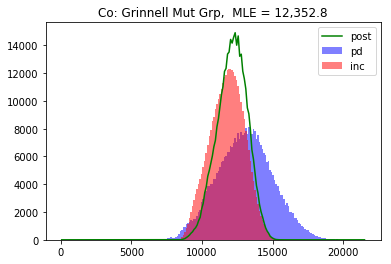

In [199]:
pdIncPlot(H,   big_cos[-1])

# Performance

In [204]:
n = 100000000
df = pd.DataFrame({
    'a': np.random.randn(n),
    'b': np.random.randn(n),
    'c': np.random.randn(n),
})
a =  np.random.randn(n)

In [222]:
%timeit r = np.sin(a - 1) + 1

NameError: name 'r' is not defined

In [220]:
%timeit r = np.sin(df['a'] - 1) + 1

1.68 s ± 65.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [221]:
%timeit r = np.sin(df['a'].values - 1) + 1

2.16 s ± 18.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [206]:
import numexpr

In [223]:
expr = 'sin(a - 1) + 1'

In [224]:
%timeit r = numexpr.evaluate(expr)

365 ms ± 16.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [225]:
def dowork(a):
    expr = 'sin(a - 1) + 1'
    return numexpr.evaluate(expr)

In [226]:
%timeit r = dowork(df['a'])

351 ms ± 11.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# Great Supply of Datasets!

In [231]:
test = pd.read_html('https://vincentarelbundock.github.io/Rdatasets/datasets.html', header=0, attrs={"class" : "dataframe"})[0]

In [233]:
test3 = pd.read_csv('http://www.mynl.com/RPM/Datasets.csv').iloc[:, 1:]  # first column is blank

In [237]:
test3.iloc[:, 1:].head()

,Package,Item,Title,Rows,Cols,has_logical,has_binary,has_numeric,has_character,CSV,Doc,CSV_link,DOC_link
0,mosaicData,Birthdays,US Births in 1969 - 1988,372864,7,False,False,False,True,CSV,DOC,https://vincentarelbundock.github.io/Rdatasets...,https://vincentarelbundock.github.io/Rdatasets...
1,gamclass,FARS,"US fatal road accident data for automobiles, 1...",151158,17,False,False,True,True,CSV,DOC,https://vincentarelbundock.github.io/Rdatasets...,https://vincentarelbundock.github.io/Rdatasets...
2,lme4,InstEval,University Lecture/Instructor Evaluations by S...,73421,7,False,True,False,False,CSV,DOC,https://vincentarelbundock.github.io/Rdatasets...,https://vincentarelbundock.github.io/Rdatasets...
3,gamclass,fars2007,"US fatal road accident data, 2007 and 2008",72548,24,False,True,False,False,CSV,DOC,https://vincentarelbundock.github.io/Rdatasets...,https://vincentarelbundock.github.io/Rdatasets...
4,gamclass,fars2008,"US fatal road accident data, 2007 and 2008",64881,24,False,True,False,False,CSV,DOC,https://vincentarelbundock.github.io/Rdatasets...,https://vincentarelbundock.github.io/Rdatasets...


In [238]:
test3.head()

,Unnamed: 0,Package,Item,Title,Rows,Cols,has_logical,has_binary,has_numeric,has_character,CSV,Doc,CSV_link,DOC_link
0,843,mosaicData,Birthdays,US Births in 1969 - 1988,372864,7,False,False,False,True,CSV,DOC,https://vincentarelbundock.github.io/Rdatasets...,https://vincentarelbundock.github.io/Rdatasets...
1,562,gamclass,FARS,"US fatal road accident data for automobiles, 1...",151158,17,False,False,True,True,CSV,DOC,https://vincentarelbundock.github.io/Rdatasets...,https://vincentarelbundock.github.io/Rdatasets...
2,741,lme4,InstEval,University Lecture/Instructor Evaluations by S...,73421,7,False,True,False,False,CSV,DOC,https://vincentarelbundock.github.io/Rdatasets...,https://vincentarelbundock.github.io/Rdatasets...
3,563,gamclass,fars2007,"US fatal road accident data, 2007 and 2008",72548,24,False,True,False,False,CSV,DOC,https://vincentarelbundock.github.io/Rdatasets...,https://vincentarelbundock.github.io/Rdatasets...
4,564,gamclass,fars2008,"US fatal road accident data, 2007 and 2008",64881,24,False,True,False,False,CSV,DOC,https://vincentarelbundock.github.io/Rdatasets...,https://vincentarelbundock.github.io/Rdatasets...


In [247]:
def explore(f):
    return pd.DataFrame([('type', type(f))] + [(i, getattr(f, i).__doc__) for i in dir(f)], columns=['Method', 'Help'])

In [248]:
explore(list)

,Method,Help
0,type,<class 'type'>
1,__add__,Return self+value.
2,__class__,"type(object_or_name, bases, dict)\ntype(object..."
3,__contains__,Return key in self.
4,__delattr__,"Implement delattr(self, name)."
5,__delitem__,Delete self[key].
6,__dir__,__dir__() -> list\ndefault dir() implementation
7,__doc__,"str(object='') -> str\nstr(bytes_or_buffer[, e..."
8,__eq__,Return self==value.
9,__format__,default object formatter


In [250]:
a = list(range(20))

In [257]:
u, v, z = a

ValueError: too many values to unpack (expected 3)

In [255]:
u, v, w, z

(0, 1, [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17], 18)